In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# Read Dataset


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,Category,Message
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name
5572,"{""mode"":""full""",isActive:false}


In [5]:
df.sample(6)

,Category,Message
1005,ham,Umma. Did she say anything
2869,ham,"Aight, tomorrow around &lt;#&gt; it is"
4608,ham,Been running but only managed 5 minutes and th...
5563,ham,Ard 6 like dat lor.
5269,spam,"If you don't, your prize will go to another cu..."
4006,ham,", ow u dey.i paid 60,400thousad.i told u woul..."


In [6]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.dropna(inplace=True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# Find Duplicates values and drop and delete them

In [8]:
df.duplicated().sum()


415

In [10]:
df.drop_duplicates(inplace=True)#change will original df
df.duplicated().sum()

0

In [39]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [11]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.describe()

,Category,Message
count,5158,5158
unique,3,5158
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


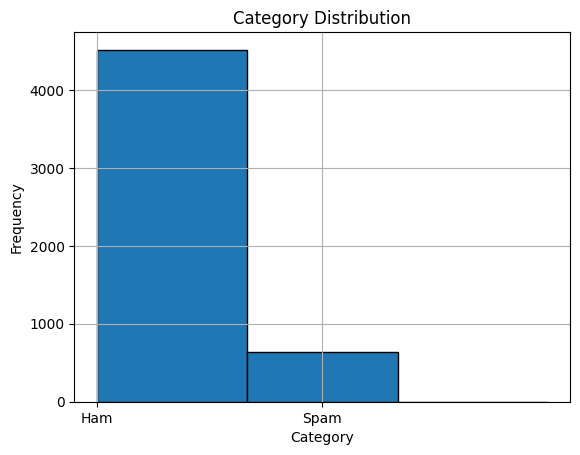

In [45]:


import matplotlib.pyplot as plt
df['Category'].hist(bins=3, edgecolor='black')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


# Divide the data in two parts - training >> 80% and testing >> 20%

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
%matplotlib inline

In [18]:
x=df['Message']
y=df['Category']
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [20]:
x_train

5059    Geeeee ... Your internet is really bad today, ...
4405               Sorry, I'll call later  &lt;#&gt; mins
1724    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
99                        I see a cup of coffee animation
1520                Check wid corect speling i.e. Sarcasm
                              ...                        
4750    Thanx u darlin!im cool thanx. A few bday drink...
474     Want 2 get laid tonight? Want real Dogging loc...
3273    MOON has come to color your dreams, STARS to m...
4022                We have to pick rayan macleran there.
882     see, i knew giving you a break a few times wou...
Name: Message, Length: 4126, dtype: object

In [21]:
x_test

1004        &lt;#&gt;  am I think? Should say on syllabus
4431          Yar lor... How u noe? U used dat route too?
666     En chikku nange bakra msg kalstiya..then had t...
3000    Oh, then your phone phoned me but it disconnected
5454         Im just wondering what your doing right now?
                              ...                        
1303    FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROK...
2305    Friendship poem: Dear O Dear U R Not Near But ...
1945    Yeah, I'll leave in a couple minutes &amp; let...
3041    One day a crab was running on the sea shore..T...
1129    Ur HMV Quiz cash-balance is currently £500 - t...
Name: Message, Length: 1032, dtype: object

In [19]:
cv=CountVectorizer()
x_train_vectorized = cv.fit_transform(x_train)
x_test_vectorized = cv.transform(x_test)
print(x_test_vectorized)

  (0, 887)	1
  (0, 3208)	1
  (0, 4182)	1
  (0, 4852)	1
  (0, 5831)	1
  (0, 6023)	1
  (0, 6745)	1
  (1, 2126)	1
  (1, 3465)	1
  (1, 4140)	1
  (1, 4717)	1
  (1, 6876)	1
  (1, 7125)	1
  (1, 7574)	1
  (2, 1741)	1
  (2, 1837)	1
  (2, 2525)	1
  (2, 3243)	1
  (2, 4536)	1
  (2, 6633)	1
  (2, 6726)	1
  (3, 1526)	1
  (3, 3696)	1
  (3, 4331)	1
  (3, 4828)	1
  :	:
  (1030, 5871)	1
  (1030, 6015)	1
  (1030, 6712)	1
  (1030, 6713)	4
  (1030, 6835)	1
  (1030, 7107)	1
  (1030, 7293)	2
  (1030, 7610)	1
  (1031, 291)	1
  (1031, 509)	1
  (1031, 642)	1
  (1031, 1158)	1
  (1031, 1627)	2
  (1031, 2075)	1
  (1031, 3406)	1
  (1031, 3579)	1
  (1031, 3683)	1
  (1031, 4322)	1
  (1031, 4536)	1
  (1031, 4759)	1
  (1031, 4863)	1
  (1031, 5440)	1
  (1031, 5912)	1
  (1031, 6835)	2
  (1031, 7107)	2


In [46]:
print(x_test_vectorized.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#Naive Bayes Algorithm


In [22]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_vectorized, y_train)


MultinomialNB()

In [23]:
y_pred = model.predict(x_test_vectorized)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U14')

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, average='weighted',pos_label='spam')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9815891472868217
Precision: 0.983739837398374
Recall: 0.9815891472868217
F1 Score: 0.9811366840409588


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'spam') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


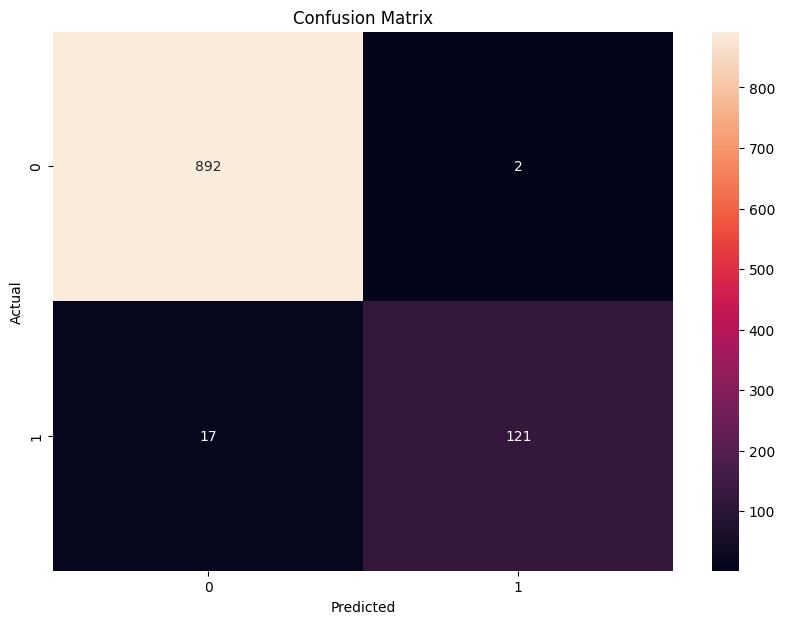

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Decison Tree Classifier


In [30]:
from sklearn.tree import DecisionTreeClassifier


j48 = DecisionTreeClassifier(criterion='entropy')

j48.fit(x_train_vectorized, y_train)

y_pred_j48 = j48.predict(x_test_vectorized)
y_pred_j48


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [28]:

accuracy_j48 = accuracy_score(y_test, y_pred_j48)
precision_j48 = precision_score(y_test, y_pred_j48, pos_label='spam')
recall_j48 = recall_score(y_test, y_pred_j48, average='weighted',pos_label='spam')
f1_j48 = f1_score(y_test, y_pred_j48, average='weighted')

print("Accuracy:", accuracy_j48)
print("Precision:", precision_j48)
print("Recall:", recall_j48)
print("F1 Score:", f1_j48)

Accuracy: 0.9612403100775194
Precision: 0.8951612903225806
Recall: 0.9612403100775194
F1 Score: 0.9603553106761665


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'spam') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


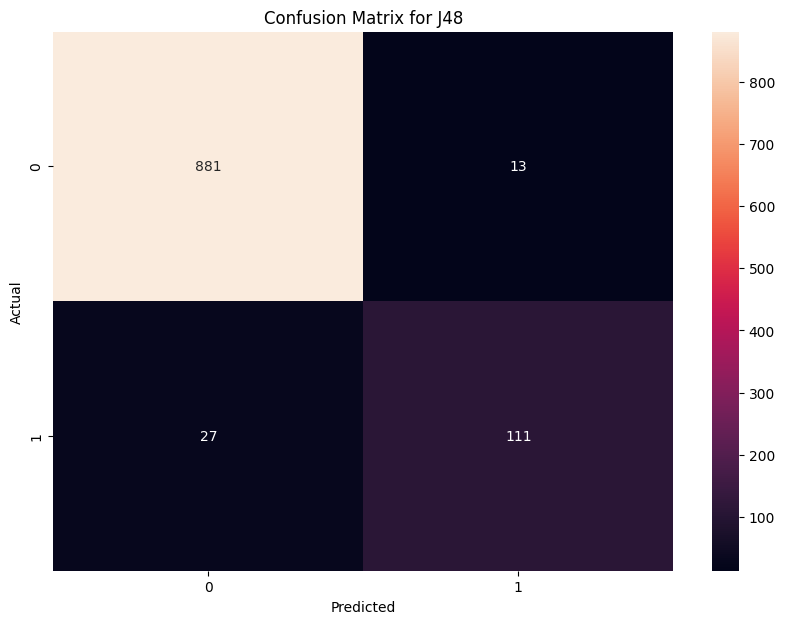

In [27]:

cm_j48 = confusion_matrix(y_test, y_pred_j48)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_j48, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for J48')
plt.show()


# Using Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression



In [32]:
lg=LogisticRegression()
lg.fit(x_train_vectorized,y_train)

LogisticRegression()

In [33]:
y_predect=lg.predict(x_test_vectorized)
y_predect

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')


Accuracy: 0.9816
Precision: 0.9837
Recall: 0.8768
F1 score: 0.9272


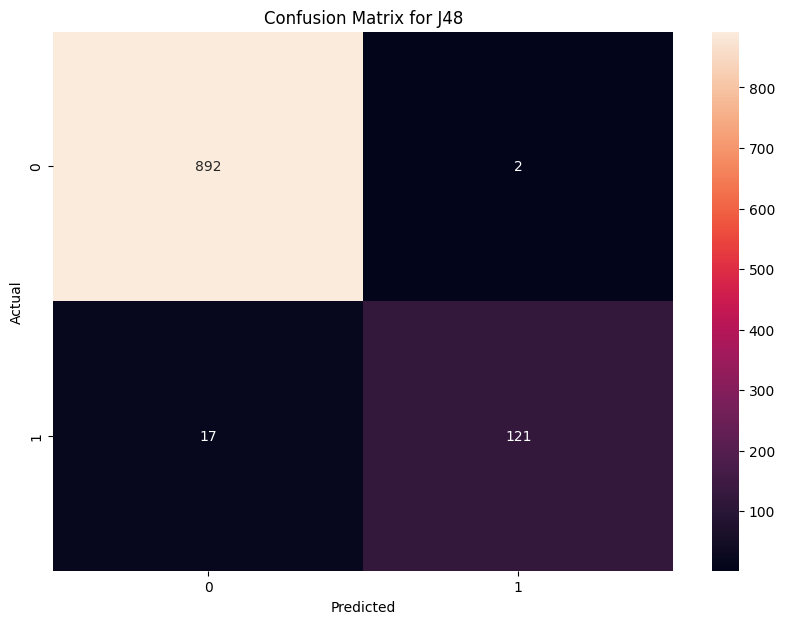

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for J48')
plt.show()

In [38]:
#Sorted form according to high accuracy
models = {
    'Naive Bayes': accuracy,
    'Decision Tree': accuracy_j48,
    'Logistic Regression': accuracy
}

sorted_models = sorted(models.items(), key=lambda x: x[1], reverse=True)

print("Models sorted by accuracy:")
for model, accuracy in sorted_models:
    print(f'{model}: {accuracy:.4f}')


Models sorted by accuracy:
Naive Bayes: 0.9612
Decision Tree: 0.9612
Logistic Regression: 0.9612
